**SUPPORT VECTOR MACHINE**

Importing required libaries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

1: Exploratory Data Analysis (EDA)

In [ ]:
df = pd.read_csv("/content/mushroom.csv")

In [ ]:
df.head()

Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0        1167    sunken       scaly     white      no  anise      descending   
1        1037    sunken     fibrous       red      no  anise         notched   
2         309      flat     grooves    purple     yes   foul      descending   
3         282      bell       scaly      pink     yes  fishy         notched   
4         820      flat      smooth    yellow     yes  musty            free   

  gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
0      distant     broad       pink  ...    partial      brown         two   
1      crowded    narrow  chocolate  ...  universal      brown         two   
2      crowded     broad     purple  ...  universal     yellow         two   
3        close     broad     orange  ...    partial     yellow         two   
4      crowded    narrow     orange  ...  universal      white        none   

   ring_type spore_print_color population  habitat      class stalk_height  \
0  sheathing         chocolate  clustered    waste  poisonous    14.276173   
1  sheathing             brown   numerous    waste     edible     3.952715   
2  sheathing            purple   abundant    waste  poisonous     9.054265   
3   cobwebby             green  clustered  grasses  poisonous     5.226499   
4       none            yellow  clustered    urban  poisonous    14.037532   

  cap_diameter  
0     5.054983  
1    19.068319  
2     7.205884  
3    20.932692  
4    12.545245  

[5 rows x 26 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

tells us if any column has missing values and shows the type of each feature.

In [ ]:
df.describe()

Unnamed: 0  stalk_height  cap_diameter
count  2000.000000   2000.000000   2000.000000
mean    624.974000      8.449118     12.314345
std     375.091938      3.697217      7.048845
min       0.000000      2.000000      1.000000
25%     290.000000      5.291009      5.723521
50%     607.000000      8.318596     12.124902
75%     957.250000     11.781272     18.698605
max    1279.000000     15.095066     25.000054

Since the Mushroom dataset is fully categorical, describe() gives frequency and unique counts per column.

In [ ]:
df.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

2: Data Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
# Encode all categorical columns
labelencoder = LabelEncoder()
df_encoded = df.apply(labelencoder.fit_transform)

Since SVM works only with numerical values, we must convert all string (categorical) data into numbers.

LabelEncoder converts each category into an integer (e.g., ‘e’ = 0, ‘p’ = 1).

We use .apply() to apply the encoding to every column in the dataset.

After encoding, our dataset is ready for training by machine learning models.

In [ ]:
# Split data
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We separate features (X) from the target label (y) where class is the label (edible/poisonous).

The dataset is split into training (80%) and testing (20%) sets.

This ensures the model is trained on one portion and evaluated on unseen data.

random_state=42 ensures results are reproducible.

3: Data Visualization

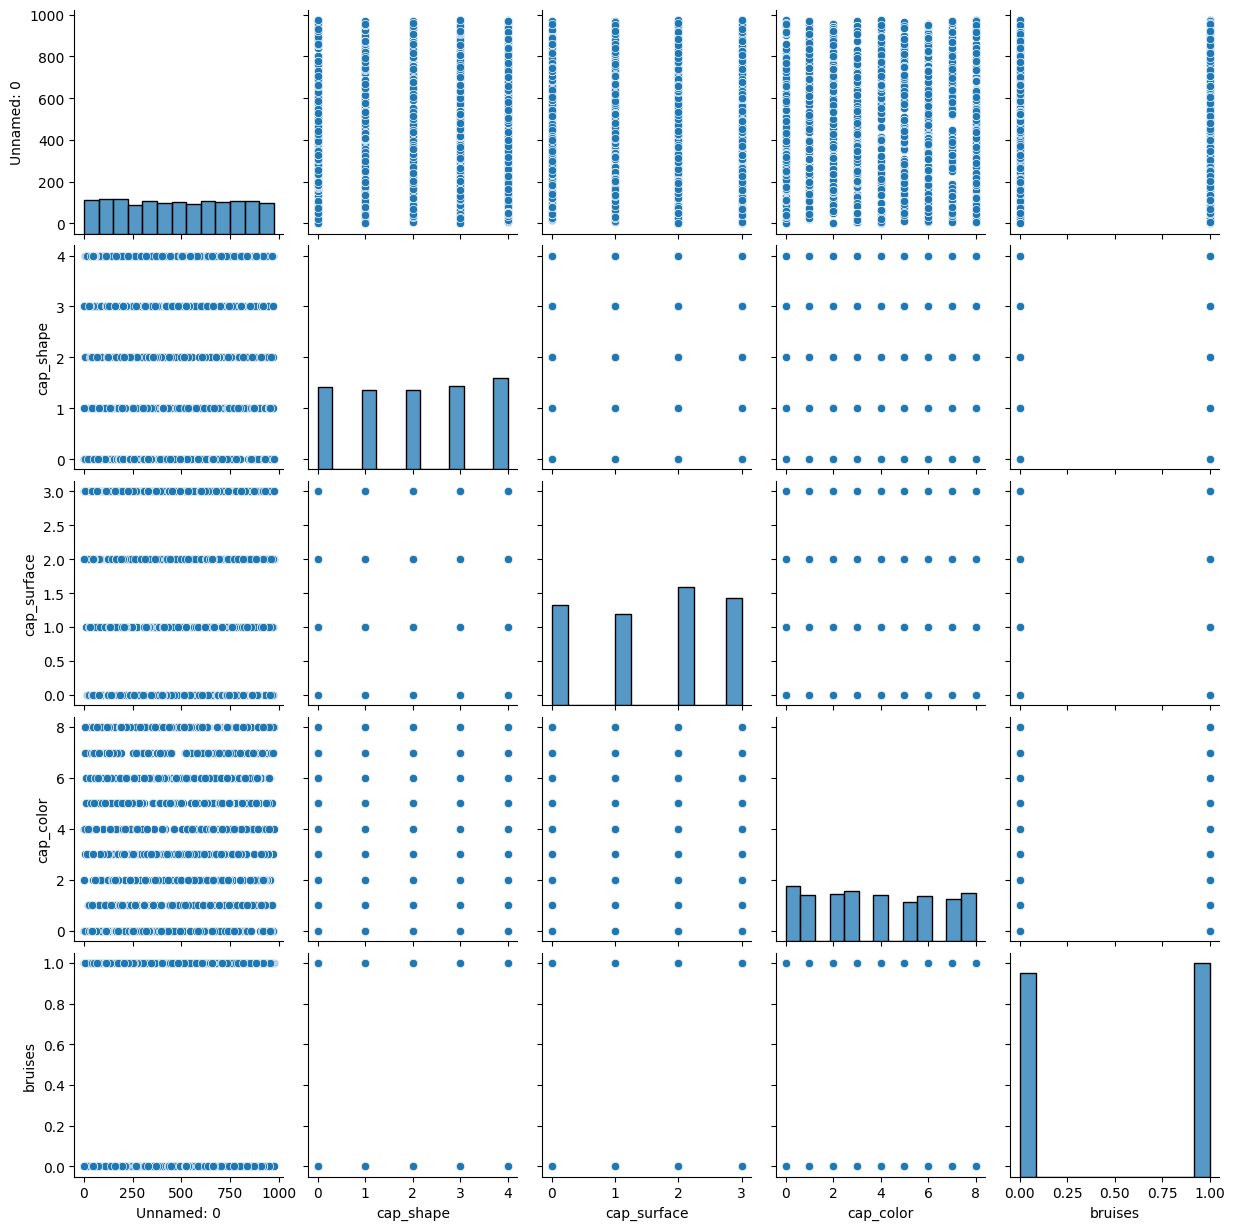

In [ ]:
# Optional: visualize feature relationships (use fewer columns due to high dimensionality)
sample_cols = df_encoded.columns[:5]
sns.pairplot(df_encoded[sample_cols])
plt.show()


Pair plots show scatterplots for each pair of selected features.
It gives insights into relationships or patterns between features.
Because the dataset is large, we select only the first few columns.
This helps visualize feature interaction and separability of classes visually.

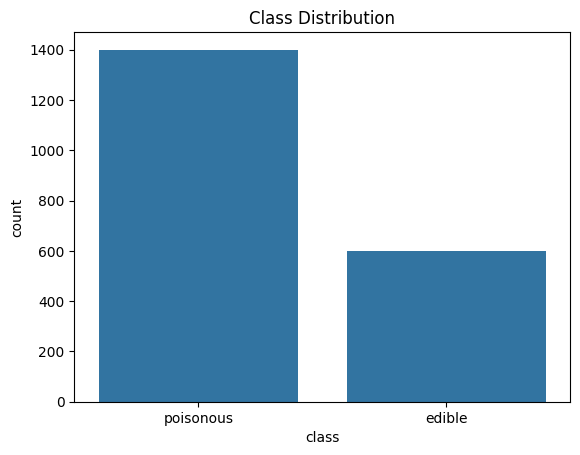

In [ ]:
# Class distribution
sns.countplot(x='class', data=df)
plt.title('Class Distribution')
plt.show()

This code plots the number of edible vs poisonous mushrooms using a count plot.

It helps us understand if the dataset is balanced or if one class dominates the other.

Imbalanced datasets may bias the model, so class distribution is crucial to check early.

Visualization gives a better understanding than just reading numerical counts.

4: SVM Implementation

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Train SVM
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

SVC()

In [ ]:
# Predictions
y_pred = svm_model.predict(X_test)

We import SVC, a class from scikit-learn used for building an SVM classifier.
The kernel defines how the algorithm maps data into higher dimensions for separation. We use 'rbf' which works well with non-linear data.
The model is trained using X_train and y_train.
After training, predictions are made using the X_test set.

In [ ]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6675
Confusion Matrix:
 [[  0 133]
 [  0 267]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400



We use accuracy to measure how often the model predicts the correct class.
The confusion matrix gives a detailed breakdown of correct vs incorrect predictions.
The classification report includes precision, recall, and F1-score.
These metrics help evaluate performance beyond accuracy, especially for imbalanced data.

5: Visualization of SVM Results

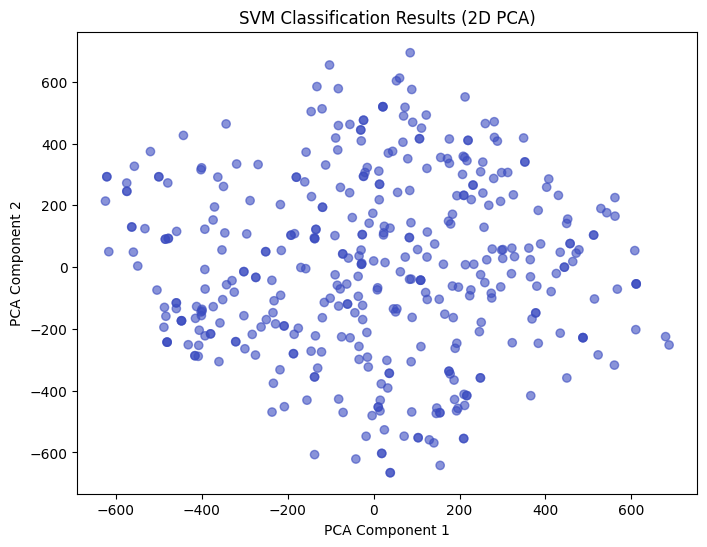

In [ ]:
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

# Plot with predictions
plt.figure(figsize=(8, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap='coolwarm', alpha=0.6)
plt.title('SVM Classification Results (2D PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


PCA reduces high-dimensional data to two dimensions for visualization.
This helps us plot the predictions in a 2D scatter plot.
Each point's color shows the predicted class, helping us see clustering and boundaries.
Although the model was trained in high dimensions, PCA gives us a visual idea of how well it separates classes.

6: Parameter Tuning and Optimization

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [1],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale']
}

# Use fewer folds and all CPU cores
grid_search = GridSearchCV(
    SVC(),
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Run the search
grid_search.fit(X_train, y_train)

# Output results
print("Best Parameters:", grid_search.best_params_)
print("Best Score (Cross-Validation):", grid_search.best_score_)


Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best Score (Cross-Validation): 0.708125162496223


Grid Search helps us automatically test combinations of hyperparameters.

'C', 'kernel', and 'gamma' are important hyperparameters for SVM.

The model is trained for each combination using 5-fold cross-validation (cv=5).

This method finds the best performing parameters based on accuracy.

7: Kernel Comparison

In [ ]:
kernels = ['linear', 'poly', 'rbf']

for kernel in kernels:
    print(f"\nTraining SVM with {kernel} kernel...")
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))



Training SVM with linear kernel...
Accuracy: 0.6675
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400


Training SVM with poly kernel...
Accuracy: 0.6675
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400


Training SVM with rbf kernel...
Accuracy: 0.6675
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           

2.	Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.

* SVM Strengths:

       * SVMs perform well in high-dimensional spaces. After label encoding, Mushroom dataset becomes high-dimensional — ideal for SVM.

       * EDA shows some features (like odor, spore-print-color) clearly separate the classes — perfect for SVM’s max-margin classification.

       * Even with fewer samples (e.g., 6000–8000), SVM still performs well without overfitting.

       * SVM can focus on support vectors, not entire distributions, so it’s less sensitive to unbalanced feature values.

       * 	we can use rbf, poly, or linear kernels to adapt to complex or simple data relationships.

* SVM Weaknesses:

      * With high-dimensional, large datasets and grid search, SVM can take a lot of time to train — especially with kernels.

      * Although you used label encoding, SVM typically prefers normalized numeric values. Raw label-encoded data may distort distances.

      * SVMs (especially with rbf) are not easily interpretable, unlike decision trees. This makes it difficult to explain why a mushroom is edible or not.

      * SVM expects numeric input, so converting categorical data with label encoding can sometimes misrepresent relationships.
      
      * Performance depends heavily on kernel, C, and gamma — needs careful tuning, which is time-consuming.


3.	Discuss practical implications of SVM in real-world classification tasks.

Support Vector Machine (SVM) is a powerful supervised machine learning algorithm widely used for classification tasks across various domains. Its practical implications depend on its strengths: robustness to high dimensions, flexibility through kernels, and strong generalization.

- Real-World Applications of SVM:
   
   * Healthcare / Bioinformatics: SVM is used to classify cancerous vs. non-cancerous cells (e.g., breast cancer detection), disease prediction using gene expression data.

   * Spam Detection	It efficiently classifies emails as spam or not spam based on word frequency and content features.

   * Cybersecurity	SVM detects intrusions, anomalies, and phishing attempts by analyzing network traffic or system behavior.

   * Image Recognition	Applied in facial recognition, handwriting detection (like digits in MNIST dataset), and object classification.

   * Speech & Text Classification	Used in sentiment analysis, part-of-speech tagging, and language identification.
   
   * Finance / Fraud Detection	SVM helps in detecting fraudulent transactions by learning patterns of normal vs. abnormal behavior.